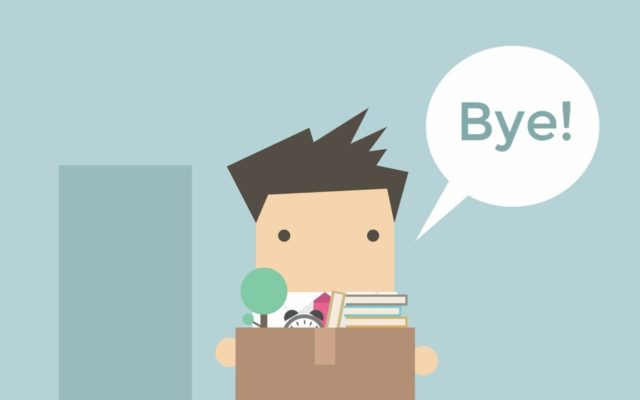

## Why they change job? Let's find out through EDA.


### This notebook is part two and starts from the middle of the analysis.New plots and analysis are available in[Part 1 of EDA](https://www.kaggle.com/ipsita001/hr-analytics-why-they-look-for-change-part1)


This dataset designed to understand the factors that lead a person to leave current job, 
by using the current credentials,demographics,experience data we have here. 

**Task one:**
**we need to predict the probability of a candidate to look for a new job or will work for the company.**

**Task two:**
**interpreting affected factors on employee decision.**

**Features**

1. enrollee_id : Unique ID for candidate
2. city: City code
3. city_ development _index : Developement index of the city (scaled)
4. gender: Gender of candidate
5. relevent_experience: Relevant experience of candidate
6. enrolled_university: Type of University course enrolled if any
7. education_level: Education level of candidate
8. major_discipline :Education major discipline of candidate
9. experience: Candidate total experience in years
10. company_size: No of employees in current employer's company
11. company_type : Type of current employer
12. lastnewjob: Difference in years between previous job and current job
13. training_hours: training hours completed
14. target: 0 – Not looking for job change, 1 – Looking for a job change

**<p style="color:red;">plz  upvote if you find this one useful. Codes are hidden,incase you are unable to see the code button use firefox browser.</p>** 

1. [Analysis on education](#Analysis_on_education)<br>
2. [Analysis on city development index](#Analysis_on_city_development_index)<br>
3. [Analysis on traing hours](#Analysis_on_traing_hours)<br>
4. [Summary](#Summary)

In [ ]:
import numpy as np
import pandas as pd
import random
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input"))

In [ ]:
df = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

In [ ]:
df.head(5).T

### Let's do some analysis on education of employees
We have information on education level, mode of education, majors they have choosen and if they have relevant experience or not. 
<a id="Analysis_on_education"></a>

In [ ]:
Uni=df.groupby(['target','enrolled_university'])['major_discipline'].value_counts().unstack()
Uni.columns=Uni.columns.tolist()
Uni.reset_index(inplace=True)
fig = px.bar(Uni, x='enrolled_university', 
             y=['Arts','Business Degree','Humanities','No Major','Other','STEM'], 
             color_discrete_map={'Arts':'limegreen','Business Degree':'salmon',
                                 'Humanities':'lightblue','No Major':'lawngreen',
                                'Other':'indigo','STEM':'crimson'},
             facet_col="target",
             template="simple_white")
fig.update_layout(title_text="Which major has more emplyees not enrolled to universities?",
        yaxis=dict(title="Count"),
        annotations=[dict(text='Stay', x=0.3, y=1.0, font_size=18, showarrow=False),
                     dict(text='Change', x=0.7, y=1.0, font_size=18, showarrow=False)])
fig.update_xaxes(title ="University education mode")
fig.show()

1. Almost all employees belongs to STEM major. Technical one. A large number of such has no unversity enrollment. 

In [ ]:
Relx=df.groupby(['target','relevent_experience'])['major_discipline'].value_counts().unstack()
Relx.columns=Relx.columns.tolist()
Relx.reset_index(inplace=True)
fig = px.bar(Relx, x='relevent_experience', 
             y=['Arts','Business Degree','Humanities','No Major','Other','STEM'], 
             color_discrete_map={'Arts':'limegreen','Business Degree':'salmon',
                                 'Humanities':'lightblue','No Major':'lawngreen',
                                 'Other':'indigo','STEM':'crimson'},
             facet_col="target",
             template="simple_white")
fig.update_layout(title_text="Which major has more emplyees with relevant experience?",
        yaxis=dict(title="Count"),
        annotations=[dict(text='Stay', x=0.3, y=1.0, font_size=18, showarrow=False),
                     dict(text='Change', x=0.7, y=1.0, font_size=18, showarrow=False)])
fig.update_xaxes(title ="Relevent experience")
fig.show()

1. Stem is creating a baised story here as well. more people with relevant experience are leaving. 

In [ ]:

Edu=df.groupby(['target','enrolled_university'])['education_level'].value_counts().unstack()
Edu.columns=Edu.columns.tolist()
Edu.reset_index(inplace=True)
fig = px.bar(Edu, x='enrolled_university', 
             y=['Graduate','High School','Masters','Phd','Primary School'], 
             color_discrete_map={'Graduate':'lawngreen','High School':'salmon',
                                 'Masters':'indigo','Phd':'crimson','Primary School':'yellow'},
             facet_col="target",
             template="simple_white")
fig.update_layout(title_text="What is education level of employees enrolled to university?",
        yaxis=dict(title="Count"),
        annotations=[dict(text='Stay', x=0.3, y=1.0, font_size=18, showarrow=False),
                     dict(text='Change', x=0.7, y=1.0, font_size=18, showarrow=False)])
fig.update_xaxes(title ="University education mode")
fig.show()

1. We have more employees who have never enrolled to an university. 

In [ ]:
EduL=df.groupby(['target','relevent_experience'])['education_level'].value_counts().unstack()
EduL.columns=EduL.columns.tolist()
EduL.reset_index(inplace=True)
fig = px.bar(EduL, x='relevent_experience', 
             y=['Graduate','High School','Masters','Phd','Primary School'], 
             color_discrete_map={'Graduate':'lawngreen','High School':'salmon',
                                 'Masters':'indigo','Phd':'crimson','Primary School':'yellow'},
             facet_col="target",
             template="simple_white")
fig.update_layout(title_text="Which education level has more relevant experience?",
        yaxis=dict(title="Count"),
        annotations=[dict(text='Stay', x=0.3, y=1.0, font_size=18, showarrow=False),
                     dict(text='Change', x=0.7, y=1.0, font_size=18, showarrow=False)])
fig.update_xaxes(title ="Relevent experience")
fig.show()

In [ ]:
RelRatio=df.groupby(['target','relevent_experience'])['enrolled_university'].value_counts().unstack()
RelRatio.columns=RelRatio.columns.tolist()
RelRatio.reset_index(inplace=True)
fig = px.bar(RelRatio, x='relevent_experience',
             y=['Full time course','Part time course','no_enrollment'],
             color_discrete_map={'Full time course':'indigo',
                                 'Part time course':'red','no_enrollment':'limegreen'},
             facet_col="target",
             template="simple_white")
fig.update_layout(title_text="Who has more relevant experience wrt mode of education?",
        yaxis=dict(title="count"),
        annotations=[dict(text='Stay', x=0.3, y=1.0, font_size=18, showarrow=False),
                     dict(text='Change', x=0.7, y=1.0, font_size=18, showarrow=False)])
fig.update_xaxes(title ="Relevent experience")
fig.show()

1. Full time course with no relevant experience are more likely to leave.
2. No enrollment with relevant experience are the largest group to leave.
3. More part time group are staying back.

### Deep analysis with respect to city development index
<a id="Analysis_on_city_development_index"></a>

In [ ]:
fig = px.box(df, x="last_new_job", y="city_development_index", color="target")
fig.update_layout(title_text="Do people in under developed city want to change Job frequently?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Last job change(in yrs)"))
fig.show()

1. Yes. It is quite evident that people who wants to stay in Job are staying in more developed city than those are leaving. 
2. Again if we notice only leaving people groups, we find the "never" group has lowest and '1' has second lowest median index value. That shows some people are okay staying in under developed cities. On the other hand people are changing frequently. 

In [ ]:
fig = px.box(df, x="gender", y="city_development_index", color="target")
fig.update_layout(title_text="Do men in under developed city want to change Job?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Gender"))
fig.show()

1. On average Female and other staying in better cities than male employess are changing. 

In [ ]:
fig = px.box(df, x="education_level", y="city_development_index", color="target")
fig.update_layout(title_text="Do highly educated people stay in better cities?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Education level"))
fig.show()

1. Forget about others but PHD groups are staying in more developed cities than others.

In [ ]:
fig = px.box(df, x="company_size", y="city_development_index", color="target")
fig.update_layout(title_text="Do develpoed cities have more small companies?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Company size"))
fig.show()

In [ ]:
fig = px.box(df, x="company_type", y="city_development_index", color="target")
fig.update_layout(title_text="Do develpoed cities have more private companies?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Company type"))
fig.show()

1. Private company and public sector are in developed cities than others.

In [ ]:
fig = px.box(df, x="relevent_experience", y="city_development_index", color="target")
fig.update_layout(title_text="Does relevent experience has an impact on city you stay?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="Relevent experience"))
fig.show()

1. Those who are looking for a change, Median index is more for people with no relevant experience. 
2. people with relevant experience are staying in underdeveloped city and are leaving.

In [ ]:
fig = px.box(df, x="enrolled_university", y="city_development_index", color="target")
fig.update_layout(title_text="Does university education mode has an impact on city you stay?",
                  yaxis = dict(title ='city development index'),
                  xaxis= dict(title="University education mode"))
fig.show()

1. People with full time course are staying in most underdeveloped cities and are leaving.

In [ ]:
fig = px.scatter(df, x="city_development_index", y="training_hours",facet_col="target",
                 title="Do developed cities have more training hours?",
                labels={'city_development_index':'City development index',
                        'training_hours':'Training hours'})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.add_annotation( # add a text callout with arrow
    text="Training hours here!", x=0.47, y=250, arrowhead=2, showarrow=True)

fig.show()

1. Develpoed cities are having good amount of traing hours where people are staying in job. 
2. Under developed cities do not have good training hours where employees are leaving. 

In [ ]:
cleannums={'experience': {">20":25,"<1":0.5}}
df=df.replace(cleannums)
df['experience']=df['experience'].astype(float)

In [ ]:
fig = px.scatter(df, x="city_development_index", y="experience",facet_col="target",
                 title='In which city do experienced people stay?',
                 labels={'city_development_index':'City development index'})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.add_annotation( # add a text callout with arrow
    text="Experienece here!", x=0.55, y=20, arrowhead=2, showarrow=True)
fig.show()

1. People with 15 to 20 years experience and staying in underdeveloped cities are looking for a change. 

### Deep analysis on training hours
<a id="Analysis_on_traing_hours"></a>


In [ ]:
change=df[df.target==1.0].groupby('experience').training_hours.median().to_frame()
stay=df[df.target==0.0].groupby('experience').training_hours.median().to_frame()
trace0 = go.Scatter(
    x=stay.index,
    y=stay['training_hours'],
    name = 'stay',
    mode='markers',
    marker=dict(size=11,color=('green')))
trace1 = go.Scatter(
    x=change.index,
    y=change['training_hours'],
    name = 'change',
    mode='markers',
    marker=dict(size=11,color = ('red')))
data = [trace0, trace1]
layout = dict(title = 'The average training hours of employees with different experience',
              xaxis = dict(title = 'Experience'),
              yaxis = dict(title = 'Median training hours'))
fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Experience', 
                                   tickmode='linear',
                                   tickfont = dict(size = 10)))
py.iplot(fig)

1. Most of the employees who are looking for a change are having less traing hours on average than who want to stay. 12 is an exception but as we have seen training hours distribution is highly right skewd and have many outliers. Now reverifying with mode.

In [ ]:
#staying 
df[df.target==0.0].groupby(['experience'])['training_hours'].apply(pd.Series.mode)

In [ ]:
#changing
df[df.target==1.0].groupby(['experience'])['training_hours'].apply(pd.Series.mode)

In [ ]:
data=[[0.5,50],[1.0,46],[2.0,28],[3.0,28],[4.0,12],[4.0,22],[4.0,23],
      [5.0,31],[6.0,21],[7.0,22],[7.0,48],[8.0,34],[9.0,11],[10.0,21],
      [11.0,17],[12.0,42],[13.0,28],[14.0,28],[15.0,6],[15.0,15],[15.0,17],[15.0,64],
      [16.0,28],[17.0,20],[18.0,22],[19.0,24],[20.0,17],[25.0,18]]      
stay=pd.DataFrame(data, columns = ['experience','mode_training_hours'])
data2=[[0.5,18],[1.0,26],[2.0,50],[3.0,13],[4.0,28],[5.0,24],[6.0,56],[7.0,17],
       [8.0,6],[9.0,24],[10.0,9],[11.0,18],[11.0,22],[12.0,10],[13.0,47],[13.0,52],
       [14.0,9],[14.0,28],[15.0,9],[15.0,18],[16.0,17],[17.0,10],[18.0,12],[18.0,13],
       [18.0,17],[18.0,18],[18.0,47],[18.0,56],[18.0,116],[19.0,13],[20.0,20],[20.0,24],
       [20.0,30],[20.0,43],[25.0,20]]
change=pd.DataFrame(data2, columns = ['experience','mode_training_hours'])

In [ ]:
trace0 = go.Scatter(
    x=stay['experience'],
    y=stay['mode_training_hours'],
    name = 'stay',
    mode='markers',
    marker=dict(size=11,color=('navy')))
trace1 = go.Scatter(
    x=change['experience'],
    y=change['mode_training_hours'],
    name = 'change',
    mode='markers',
    marker=dict(size=11,color = ('aqua')))
data = [trace0, trace1]
layout = dict(title = 'The most frequent training hours of employees with different experience',
              xaxis = dict(title = 'Experience'),
              yaxis = dict(title = 'Most frequent training hours'))
fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Experience',tickmode='linear',tickfont = dict(size = 10)))
py.iplot(fig)

1. This concludes the previous findings upside down. Now 12 has different status. 50% of the employees who are changing have lower training hours and others highers. 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(x=df['gender'][ df['target'] == 0.0 ],
                        y=df['training_hours'][ df['target'] == 0.0 ],
                        name='Stay',line_color='blue'))
fig.add_trace(go.Violin(x=df['gender'][ df['target'] == 1.0 ],
                        y=df['training_hours'][ df['target'] == 1.0],
                        name='Change',line_color='orange'))
fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(dict(title='Which gender group have longest training hours?',
                       violinmode='group',violingroupgap=0,
                       yaxis=dict(title='Training hours')))
fig.show()

1. It is sad to see others who are looking for a change have longest training hours. 

In [ ]:
def violinGruop(df,col_name=None,title=None,color1=None,color2=None):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=df[col_name][ df['target'] == 0.0 ],
                            y=df['training_hours'][ df['target'] == 0.0 ],
                            name='Stay',
                            side='positive',
                            line_color=color1))
    fig.add_trace(go.Violin(x=df[col_name][ df['target'] == 1.0 ],                            
                            y=df['training_hours'][ df['target'] == 1.0],
                            name='Change',
                            side='negative',
                            line_color=color2))
    fig.update_traces(meanline_visible=True)
    fig.update_layout(dict(title=title,violingap=0,violingroupgap=0,violinmode='overlay',
                           yaxis=dict(title='Training hours')))
    fig.show()

In [ ]:
violinGruop(df=df, col_name='last_new_job',
            title='Do long training hours impact job change frequency?',
            color1='purple',color2='red')

In [ ]:
violinGruop(df=df, col_name='relevent_experience',
            title='Do employees with no relevenat experience go though long training hours?',
            color1='lawngreen',color2='red')

In [ ]:
violinGruop(df=df, col_name='enrolled_university',
            title='Do university enrolled employees take less training hours?',
            color1='dodgerblue',color2='lightpink')

In [ ]:
violinGruop(df=df, col_name='education_level',
            title='Do employees with higher education need less training?',
            color1='salmon',color2='limegreen')

In [ ]:
violinGruop(df=df, col_name='major_discipline',
            title='Which major have longest training hours?',
            color1='gray',color2='red')

1. Humanities and others have more training hours. 

In [ ]:
violinGruop(df=df, col_name='company_size',
            title='Do large companies have longer traing hours?',
            color1='magenta',color2='limegreen')

1. smaller companies have longer training hours. 

In [ ]:
violinGruop(df=df, col_name='company_type',
            title='Do start ups have longer traing hours?',
            color1='yellow',color2='limegreen')

1. NGO and others have more training hours. 

### Summary
<a id="Summary"></a>
Some significant factors based on our findings are-  Gender disparity, development of city, relevant experience. This is as per EDA.
1. University education mode seems to be a least important factor as majority is not enrolled. Every education is possible without enrollment as well. 
2. Traing hours turns out to be quite confusing in many cases. But one thing with gender that others are having more traing hours. 
3. City development is definitely an important factor. 
4. Most of the employees belong private sector and most of them are men.
   Many employees prefer to stay in developed cities, mostly under developed city people are leaving.
6. Gender disparity is a reality in job sectors. Our analysis too shows, women and others are neglected. They are staying back or leaving is just a choice. Their education relevance has nothing to help them.
7. Graduates will leave and we more graduates.
8. Younger generation even if they dont have relevant experience will leave. All genders,graduates or not, whatever be the mode of education or company size and type, the younger they are more likely to leave.
